# Messy Midterm 

Maria van Venrooy

## Social Problem - Plastic Polution 

Get the data into a dataframe:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Delaware_Coastal_Cleanup_Results.csv") 
    
df.head()
    

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,...,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.0,...,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.0,...,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.0,...,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.5,...,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.0,...,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN


I want to get some general information to help me better understand the data set

In [2]:
df["County"].value_counts()

Sussex        277
Kent          139
New Castle     78
Name: County, dtype: int64

In [3]:
df["Cleanup Type"].value_counts()

Beach                                 312
Land (beach, shoreline and inland)    180
Watercraft                              2
Name: Cleanup Type, dtype: int64

Mostly beach and land, just 2 by watercraft

In [4]:
df["Cleanup Site"].value_counts()

Bethany Beach                            13
Battery Park                             12
Lewes Beach                              12
Fenwick Island State Park                12
Rehoboth Beach                           12
                                         ..
C & D Canal - St. Georges                 1
Love Creek/Boat Hole                      1
Cape Henlopen-Herring Point               1
Augustine Wildlife Area - Impoundment     1
Holts Landing                             1
Name: Cleanup Site, Length: 138, dtype: int64

In [5]:
df["Cleanup Date"].value_counts()

09/16/2017    47
09/17/2016    46
09/19/2015    46
09/20/2014    45
09/14/2019    44
09/21/2013    42
09/22/2018    39
09/17/2011    37
09/15/2012    37
09/25/2010    35
09/19/2009    34
09/20/2008    30
10/04/2008     1
09/18/2011     1
09/13/2019     1
09/24/2016     1
09/27/2015     1
09/13/2014     1
06/18/2010     1
10/10/2012     1
11/12/2008     1
09/16/2016     1
09/15/2017     1
09/12/2009     1
Name: Cleanup Date, dtype: int64

Looks like from 2008 to 2019 there's a big cleanup day in September at lots of different locations, and a few other days scattered about at individual sites

In [6]:
df["People"].mean()

42.27732793522267

array([[<AxesSubplot:title={'center':'People'}>]], dtype=object)

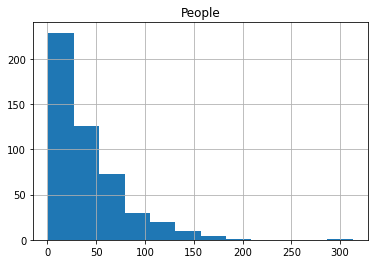

In [5]:
df.hist(column = "People", bins=12)

In [8]:
df["Pounds"].mean()

275.2849190283401

array([[<AxesSubplot:title={'center':'Pounds'}>]], dtype=object)

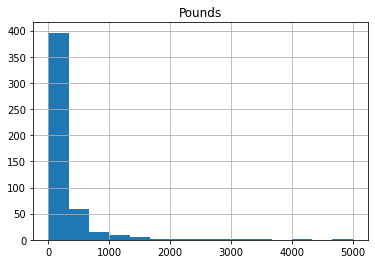

In [9]:
df.hist(column = "Pounds", bins=15)

## Question - Has the amount of smoking-related trash collected during DE cleanups decreased as smoking in Delaware has decreased?

In the United States, the cigarette smoking rate has decreased from 29.10% in 2007 to 25.10% in 2018 (MacroTrends.net). The years included in the cleanup data are from 2008 to 2018. 

Source: https://www.macrotrends.net/countries/USA/united-states/smoking-rate-statistics

In [2]:
allCols = list(df)
allCols

['County',
 'Location Lat-Long',
 'Cleanup Type',
 'Cleanup Date',
 'Cleanup Site',
 'Adults',
 'Children',
 'People',
 'Pounds',
 'Miles',
 'Bags',
 'Cigarette Butts',
 'Food Wrappers',
 'Take Out/Away Containers (Plastic)',
 'Take Out/Away Containers (Foam)',
 'Bottle Caps (Plastic)',
 'Bottle Caps (Metal)',
 'Lids (Plastic)',
 'Straws, Stirrers',
 'Forks, Knives, Spoons',
 'Beverage Bottles (Plastic)',
 'Beverage Bottles (Glass)',
 'Beverage Cans',
 'Grocery Bags (Plastic)',
 'Other Plastic Bags',
 'Paper Bags',
 'Cups, Plates (Paper)',
 'Cups, Plates (Plastic)',
 'Cups, Plates (Foam)',
 'Fishing Buoys, Pots & Traps',
 'Fishing Net & Pieces',
 'Fishing Line',
 'Rope',
 '6-Pack Holders',
 'Other Plastic/Foam Packaging',
 'Other Plastic Bottles',
 'Strapping Bands',
 'Tobacco Packaging/Wrap',
 'Appliances',
 'Balloons',
 'Cigar Tips',
 'Cigarette Lighters',
 'Construction Materials',
 'Fireworks',
 'Tires',
 'Toys',
 'Condoms',
 'Diapers',
 'Syringes',
 'Tampons/Tampon Applicators',
 

In [3]:
#Smoking related: 'Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters'
smokingdf = df[['Cleanup Date','Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters']];
smokingdf

,Cleanup Date,Cigarette Butts,Tobacco Packaging/Wrap,Cigar Tips,Cigarette Lighters
0,09/20/2008,8.0,4.0,16.0,27.0
1,09/20/2008,4.0,NaN,NaN,5.0
2,09/20/2008,172.0,11.0,4.0,8.0
3,09/20/2008,541.0,25.0,163.0,43.0
4,09/20/2008,75.0,5.0,9.0,7.0
...,...,...,...,...,...
489,09/14/2019,300.0,100.0,10.0,5.0
490,09/14/2019,17.0,12.0,0.0,0.0
491,09/14/2019,762.0,20.0,59.0,6.0
492,09/14/2019,109.0,21.0,12.0,2.0


In [47]:
listOfSmokingColumns = ['Cigarette Butts', 'Tobacco Packaging/Wrap', 'Cigar Tips', 'Cigarette Lighters'];
totalsmoke = df[listOfSmokingColumns].sum(axis=1);
smokingdf['total smoking items'] = totalsmoke;
smokingdf

<ipython-input-47-e277a2e46269>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokingdf['total smoking items'] = totalsmoke;


,Cleanup Date,Cigarette Butts,Tobacco Packaging/Wrap,Cigar Tips,Cigarette Lighters,total smoking items
0,09/20/2008,8.0,4.0,16.0,27.0,55.0
1,09/20/2008,4.0,NaN,NaN,5.0,9.0
2,09/20/2008,172.0,11.0,4.0,8.0,195.0
3,09/20/2008,541.0,25.0,163.0,43.0,772.0
4,09/20/2008,75.0,5.0,9.0,7.0,96.0
...,...,...,...,...,...,...
489,09/14/2019,300.0,100.0,10.0,5.0,415.0
490,09/14/2019,17.0,12.0,0.0,0.0,29.0
491,09/14/2019,762.0,20.0,59.0,6.0,847.0
492,09/14/2019,109.0,21.0,12.0,2.0,144.0


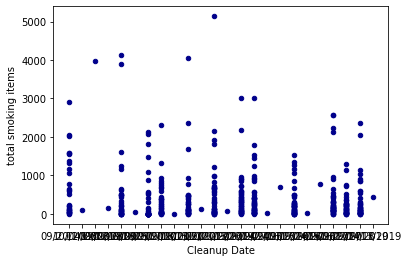

In [48]:
ax1 = smokingdf.plot.scatter(x='Cleanup Date',
                      y='total smoking items',
                      c='DarkBlue')



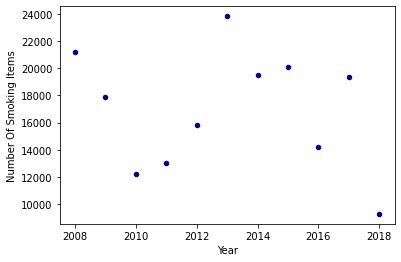

In [49]:
#Total amount of smoking related items found on cleanup day each day

smoke08 = smokingdf[smokingdf['Cleanup Date'] == '09/20/2008'];
smoke08 = smoke08['total smoking items'].sum();

smoke09 = smokingdf[smokingdf['Cleanup Date'] == '09/19/2009'];
smoke09 = smoke09['total smoking items'].sum();

smoke10 = smokingdf[smokingdf['Cleanup Date'] == '09/25/2010'];
smoke10 = smoke10['total smoking items'].sum();

smoke11 = smokingdf[smokingdf['Cleanup Date'] == '09/17/2011'];
smoke11 = smoke11['total smoking items'].sum();

smoke12 = smokingdf[smokingdf['Cleanup Date'] == '09/15/2012'];
smoke12 = smoke12['total smoking items'].sum();

smoke13 = smokingdf[smokingdf['Cleanup Date'] == '09/21/2013'];
smoke13 = smoke13['total smoking items'].sum();

smoke14 = smokingdf[smokingdf['Cleanup Date'] == '09/20/2014'];
smoke14 = smoke14['total smoking items'].sum();

smoke15 = smokingdf[smokingdf['Cleanup Date'] == '09/19/2015'];
smoke15 = smoke15['total smoking items'].sum();

smoke16 = smokingdf[smokingdf['Cleanup Date'] == '09/17/2016'];
smoke16 = smoke16['total smoking items'].sum();

smoke17 = smokingdf[smokingdf['Cleanup Date'] == '09/16/2017'];
smoke17 = smoke17['total smoking items'].sum();

smoke18 = smokingdf[smokingdf['Cleanup Date'] == '09/22/2018'];
smoke18 = smoke18['total smoking items'].sum();

smokeyeartotals = [smoke08,smoke09,smoke10,smoke11,smoke12,smoke13,smoke14,smoke15,smoke16,smoke17,smoke18]
smokeyears = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

#df1 = pd.DataFrame(smokeyears);
#df2 = pd.DataFrame(smokeyeartotals)

smoketotalsdfunt = pd.DataFrame([smokeyears,smokeyeartotals]);
smoketotalsdf = smoketotalsdfunt.T;
smoketotalsdf.columns = ['Year', 'Number Of Smoking Items']

smoketotalsdf

ax1 = smoketotalsdf.plot.scatter(x='Year',
                        y='Number Of Smoking Items',
                      c='DarkBlue')

Hmm defnitely not a clear correlation between year and number of smoking-related items retrieved. Let's try to see if the percent of recovered items that are smoking related increases or decreases

In [7]:
df

,County,Location Lat-Long,Cleanup Type,Cleanup Date,Cleanup Site,Adults,Children,People,Pounds,Miles,...,Tampons/Tampon Applicators,Foam Pieces,Glass Pieces,Plastic Pieces,"Clothing, Shoes",Shotgun Shells/Wadding,Light Bulbs/Tubes,Batteries,Cars/Car Parts,55-Gallon Drums
0,Kent,"(39.102739, -75.402356)",Beach,09/20/2008,Kitts Hummock,NaN,NaN,45,1500.0,1.0,...,15.0,NaN,NaN,NaN,11.0,70.0,1.0,NaN,4.0,3.0
1,Kent,"(39.085748, -75.421875)",Beach,09/20/2008,Ted Harvey WLA/ Ted Harvey Wildlife Area,NaN,NaN,45,165.0,2.0,...,NaN,NaN,NaN,NaN,4.0,33.0,2.0,NaN,NaN,NaN
2,New Castle,"(39.738765, -75.53939)",Beach,09/20/2008,E. 7th Street - Barbiarz Park,NaN,NaN,18,180.0,1.0,...,NaN,NaN,NaN,NaN,20.0,NaN,2.0,4.0,3.0,NaN
3,New Castle,"(39.664715, -75.557785)",Beach,09/20/2008,Battery Park,NaN,NaN,51,892.0,0.5,...,48.0,NaN,NaN,NaN,37.0,12.0,2.0,0.0,19.0,0.0
4,New Castle,"(39.504724, -75.580976)",Beach,09/20/2008,Augustine Beach Boat Ramp,NaN,NaN,70,2200.0,1.0,...,5.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Sussex,"(38.649012404822, -75.597083294508)","Land (beach, shoreline and inland)",09/14/2019,Williams Pond,23.0,15.0,38,211.0,2.0,...,0.0,75.0,75.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN
490,Kent,"(39.308904852133, -75.515056403041)","Land (beach, shoreline and inland)",09/14/2019,Woodland Beach- Hay Point Landing Rd,8.0,0.0,8,199.0,2.0,...,0.0,0.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
491,Kent,"(39.332049613013, -75.472113895106)","Land (beach, shoreline and inland)",09/14/2019,Woodland Beach Pier,16.0,5.0,21,100.0,2.0,...,0.0,19.0,46.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN
492,Kent,"(39.331788936134, -75.471999109145)","Land (beach, shoreline and inland)",09/14/2019,Woodland Beach-Boat Ramp,6.0,20.0,26,63.0,2.0,...,0.0,7.0,17.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:

alltrashcols = [
 'Cigarette Butts',
 'Food Wrappers',
 'Take Out/Away Containers (Plastic)',
 'Take Out/Away Containers (Foam)',
 'Bottle Caps (Plastic)',
 'Bottle Caps (Metal)',
 'Lids (Plastic)',
 'Straws, Stirrers',
 'Forks, Knives, Spoons',
 'Beverage Bottles (Plastic)',
 'Beverage Bottles (Glass)',
 'Beverage Cans',
 'Grocery Bags (Plastic)',
 'Other Plastic Bags',
 'Paper Bags',
 'Cups, Plates (Paper)',
 'Cups, Plates (Plastic)',
 'Cups, Plates (Foam)',
 'Fishing Buoys, Pots & Traps',
 'Fishing Net & Pieces',
 'Fishing Line',
 'Rope',
 '6-Pack Holders',
 'Other Plastic/Foam Packaging',
 'Other Plastic Bottles',
 'Strapping Bands',
 'Tobacco Packaging/Wrap',
 'Appliances',
 'Balloons',
 'Cigar Tips',
 'Cigarette Lighters',
 'Construction Materials',
 'Fireworks',
 'Tires',
 'Toys',
 'Condoms',
 'Diapers',
 'Syringes',
 'Tampons/Tampon Applicators',
 'Foam Pieces',
 'Glass Pieces',
 'Plastic Pieces',
 'Clothing, Shoes',
 'Shotgun Shells/Wadding',
 'Light Bulbs/Tubes',
 'Batteries',
 'Cars/Car Parts',
 '55-Gallon Drums'];

In [51]:
smokebyperc = df;

#alltrash08df = smokebyperc.loc[smokebyperc['Cleanup Date'] == '09/20/2008']
alltrash =  smokebyperc[alltrashcols].sum(axis=1);
alltrash

0      1247.0
1       332.0
2       956.0
3      6075.0
4       733.0
        ...  
489    2310.0
490     615.0
491    1859.0
492    1214.0
493     841.0
Length: 494, dtype: float64

In [52]:
smokebyperc['all trash num'] = alltrash;

smokebyperc

alltrash08 = smokebyperc[smokebyperc['Cleanup Date'] == '09/20/2008'];
alltrash08 = alltrash08['all trash num'].sum();

alltrash09 = smokebyperc[smokebyperc['Cleanup Date'] == '09/19/2009'];
alltrash09 = alltrash09['all trash num'].sum();

alltrash10 = smokebyperc[smokebyperc['Cleanup Date'] == '09/25/2010'];
alltrash10 = alltrash10['all trash num'].sum();

alltrash11 = smokebyperc[smokebyperc['Cleanup Date'] == '09/17/2011'];
alltrash11 = alltrash11['all trash num'].sum();

alltrash12 = smokebyperc[smokebyperc['Cleanup Date'] == '09/15/2012'];
alltrash12 = alltrash12['all trash num'].sum();

alltrash13 = smokebyperc[smokebyperc['Cleanup Date'] == '09/21/2013'];
alltrash13 = alltrash13['all trash num'].sum();

alltrash14 = smokebyperc[smokebyperc['Cleanup Date'] == '09/20/2014'];
alltrash14 = alltrash14['all trash num'].sum();

alltrash15 = smokebyperc[smokebyperc['Cleanup Date'] == '09/19/2015'];
alltrash15 = alltrash15['all trash num'].sum();

alltrash16 = smokebyperc[smokebyperc['Cleanup Date'] == '09/17/2016'];
alltrash16 = alltrash16['all trash num'].sum();

alltrash17 = smokebyperc[smokebyperc['Cleanup Date'] == '09/16/2017'];
alltrash17 = alltrash17['all trash num'].sum();

alltrash18 = smokebyperc[smokebyperc['Cleanup Date'] == '09/22/2018'];
alltrash18 = alltrash18['all trash num'].sum();


alltrashyeartotals = [alltrash08,alltrash09,alltrash10,alltrash11,alltrash12,alltrash13,alltrash14,alltrash15,alltrash16,alltrash17,alltrash18]
alltrashyeartotals



[65317.0,
 58137.0,
 28145.0,
 64596.0,
 40644.0,
 65904.0,
 69231.0,
 64301.0,
 53296.0,
 59285.0,
 52787.0]

In [53]:
smokeaspercdf = smoketotalsdf;
smokeaspercdf['Total trash items'] = alltrashyeartotals;
#smokeaspercdf

smokeasperccol = smokeaspercdf['Number Of Smoking Items'] / smokeaspercdf['Total trash items'] * 100
smokeaspercdf['Percent items smoke related'] = smokeasperccol;
smokeaspercdf

,Year,Number Of Smoking Items,Total trash items,Percent items smoke related
0,2008.0,21229.0,65317.0,32.501493
1,2009.0,17848.0,58137.0,30.699899
2,2010.0,12210.0,28145.0,43.382484
3,2011.0,13008.0,64596.0,20.137470
4,2012.0,15819.0,40644.0,38.920874
5,2013.0,23822.0,65904.0,36.146516
6,2014.0,19515.0,69231.0,28.188239
7,2015.0,20103.0,64301.0,31.263899
8,2016.0,14216.0,53296.0,26.673672
9,2017.0,19329.0,59285.0,32.603525


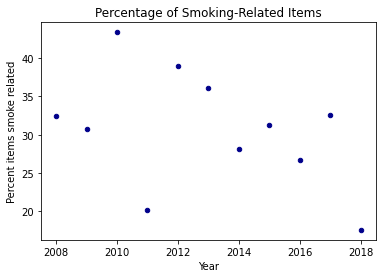

In [54]:
ax1 = smokeaspercdf.plot.scatter(x='Year',
                        y='Percent items smoke related',
                      c='DarkBlue',
                        title = "Percentage of Smoking-Related Items")

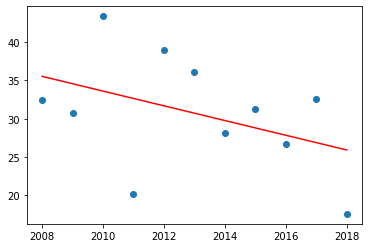

In [55]:
%matplotlib inline

x = smokeaspercdf['Year'];
y = smokeaspercdf['Percent items smoke related']

model = np.polyfit(x,y,1)

predict = np.poly1d(model)
x_lin_reg = range(2008,2019)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x,y);
plt.plot(x_lin_reg, y_lin_reg, c = 'r')


#Source referenced:
#https://data36.com/linear-regression-in-python-numpy-polyfit/
    

In [56]:
start = 2008;
predict(start)

35.53458868594521

In [57]:
end = 2018;
predict(end)

25.939870021286197

The regression model shows a decrease in percentage of smoking-related trash from ~35% of items in 2008 to ~26% of items in 2018

In [26]:
import sklearn.metrics as metrics
yhat = [predict(2008),predict(2009),predict(2010),predict(2011),predict(2012),predict(2013),predict(2014),predict(2015),predict(2016),predict(2017),predict(2018)]

mae = metrics.mean_absolute_error(y,yhat);
print("Mean absolute error: ",mae);

r2 = metrics.r2_score(y,yhat);
print("R-squared: ", r2);

Mean absolute error:  5.554562804179552
R-squared:  0.17728825650900615


Yikes! R-squared is ~18%, so we have very high variance, so the fit of the model is poor. Given the high variance of the model, it would not be wise to draw any conclusions from this data. 

Source: https://www.knowledgehut.com/blog/data-science/interpret-r-squared-and-goodness-fit-regression-analysis


## Single Use Plastics

Now let's look at single use plastics! What is a single-use plastic? It's an item made of plastic which is meant to be disposed of right after use (NRDC). This includes plastic waterbottles, plastic grocery bags, plastics takeout containers, plastic packaging for food products, and more. 

According to earthday.org, "Single-use-plastics frequently do not make it to a landfill or are recycled. A full 32% of the 78 million tons of plastic packaging produced annually is left to flow into our oceans; the equivalent of pouring one garbage truck fill of plastic into the ocean every minute" (earthday.org)

Why are single use plastics a problem? Because plastic cannot biodegrade; instead it breaks up into lots of tiny pieces called microplastics. According to Nature's Path, " It can take up to thousands of years for [plastic] to decompose. In the meantime, it contaminates our soil and water. The toxic chemicals used to manufacture plastic gets transfered to animal tissue, eventually entering the human food chain... and can damage nervous systems, lungs, and reproductive organs" 

Nature's also points out that plastic also negatively impacts sea creatures, "Plastic items like bags and straws choke wildlife and block animals' stomachs"

I am focusing on single use plastics here because they make up such a large portion of all plastics, and they are (by definition) super wasteful. There has been a recent push to ban different single use plastics (See Delaware 2021 plastic bag ban from delaware.gov source below). It is important to get a clear picture of how much single use plastic ends up on our beaches, as this information could help drive more policies like the plastic bag ban.


Sources: 
- https://www.nrdc.org/stories/single-use-plastics-101#what
- https://www.earthday.org/fact-sheet-single-use-plastics/
- https://www.naturespath.com/en-us/blog/single-use-plastics-bad-can/
- https://news.delaware.gov/2020/12/01/plastic-carryout-bag-ban-effective-on-jan-1-2021/

In [59]:
singleUsePlastics = [
                        'Cigarette Butts',
                     'Food Wrappers',
                     'Take Out/Away Containers (Plastic)',
                     'Take Out/Away Containers (Foam)',
                     'Bottle Caps (Plastic)',
                     'Lids (Plastic)',
                     'Straws, Stirrers',
                     'Forks, Knives, Spoons',
                     'Beverage Bottles (Plastic)',
                     'Grocery Bags (Plastic)',
                     'Other Plastic Bags',
                     'Cups, Plates (Plastic)',
                     'Cups, Plates (Foam)',
                     'Other Plastic Bottles',
                     'Balloons',
                     'Cigar Tips',
                     'Tampons/Tampon Applicators'
                      ]

singleUsePlasticswDate = [ 'Cleanup Date',
                        'Cigarette Butts',
                     'Food Wrappers',
                     'Take Out/Away Containers (Plastic)',
                     'Take Out/Away Containers (Foam)',
                     'Bottle Caps (Plastic)',
                     'Lids (Plastic)',
                     'Straws, Stirrers',
                     'Forks, Knives, Spoons',
                     'Beverage Bottles (Plastic)',
                     'Grocery Bags (Plastic)',
                     'Other Plastic Bags',
                     'Cups, Plates (Plastic)',
                     'Cups, Plates (Foam)',
                     'Other Plastic Bottles',
                     'Balloons',
                     'Cigar Tips',
                     'Tampons/Tampon Applicators'
                      ]

#Reference to see if some items (cigarette butts, food wrappers) are considered single use: 
# https://www.naturespath.com/en-us/blog/single-use-plastics-bad-can/ 

ETHICS ALERT!!! Condoms are listed as their own category for the cleanups, and technically they are a single-use plastic, but there are certainly some ethical concerns with discouraging the use of condoms based on them being single use. I will be excluding condoms from my list of single use plastics, both due to ethical concerns and the fact that most condoms are made from plant-based latex (https://en.wikipedia.org/wiki/Latex#Personal_and_healthcare_products)

This realization has prompted me to see another ethical issue: my analysis could be used to assert that individuals are responsible for pollution, rather than corporations. Personally I think that personal actions like using a reusable waterbottle and buying things used rather than new are important and valuable, but placing responsibility exclusively on consumers is definitely problematic.

In [60]:
sudf = df[singleUsePlasticswDate];
totalsingleuse = df[singleUsePlastics].sum(axis=1);

sudf['single use total'] = totalsingleuse;
sudf.head()

<ipython-input-60-446d7366d18e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sudf['single use total'] = totalsingleuse;


,Cleanup Date,Cigarette Butts,Food Wrappers,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Grocery Bags (Plastic),Other Plastic Bags,"Cups, Plates (Plastic)","Cups, Plates (Foam)",Other Plastic Bottles,Balloons,Cigar Tips,Tampons/Tampon Applicators,single use total
0,09/20/2008,8.0,64.0,NaN,NaN,141.0,NaN,52.0,31.0,111.0,81.0,NaN,NaN,NaN,15.0,26.0,16.0,15.0,560.0
1,09/20/2008,4.0,12.0,NaN,NaN,18.0,NaN,21.0,23.0,62.0,28.0,NaN,NaN,NaN,14.0,10.0,NaN,NaN,192.0
2,09/20/2008,172.0,100.0,NaN,NaN,68.0,NaN,43.0,35.0,68.0,133.0,NaN,NaN,NaN,2.0,0.0,4.0,NaN,625.0
3,09/20/2008,541.0,871.0,NaN,NaN,1446.0,NaN,598.0,303.0,759.0,290.0,NaN,NaN,NaN,30.0,20.0,163.0,48.0,5069.0
4,09/20/2008,75.0,7.0,NaN,NaN,110.0,NaN,80.0,25.0,200.0,60.0,NaN,NaN,NaN,2.0,1.0,9.0,5.0,574.0


In [65]:
finalsingleusedf = smokeaspercdf[['Year', 'Total trash items']];

singleuse08 = sudf[sudf['Cleanup Date'] == '09/20/2008'];
singleuse08 = singleuse08['single use total'].sum();

singleuse09 = sudf[sudf['Cleanup Date'] == '09/19/2009'];
singleuse09 = singleuse09['single use total'].sum();

singleuse10 = sudf[sudf['Cleanup Date'] == '09/25/2010'];
singleuse10 = singleuse10['single use total'].sum();

singleuse11 = sudf[sudf['Cleanup Date'] == '09/17/2011'];
singleuse11 = singleuse11['single use total'].sum();

singleuse12 = sudf[sudf['Cleanup Date'] == '09/15/2012'];
singleuse12 = singleuse12['single use total'].sum();

singleuse13 = sudf[sudf['Cleanup Date'] == '09/21/2013'];
singleuse13 = singleuse13['single use total'].sum();

singleuse14 = sudf[sudf['Cleanup Date'] == '09/20/2014'];
singleuse14 = singleuse14['single use total'].sum();

singleuse15 = sudf[sudf['Cleanup Date'] == '09/19/2015'];
singleuse15 = singleuse15['single use total'].sum();

singleuse16 = sudf[sudf['Cleanup Date'] == '09/17/2016'];
singleuse16 = singleuse16['single use total'].sum();

singleuse17 = sudf[sudf['Cleanup Date'] == '09/16/2017'];
singleuse17 = singleuse17['single use total'].sum();

singleuse18 = sudf[sudf['Cleanup Date'] == '09/22/2018'];
singleuse18 = singleuse18['single use total'].sum();

singleuseyeartotals = [singleuse08,singleuse09,singleuse10,singleuse11,singleuse12,singleuse13,singleuse14,singleuse15,singleuse16,singleuse17,singleuse18]

finalsingleusedf['Num Single Use'] = singleuseyeartotals


SupAsPercCol = finalsingleusedf['Num Single Use'] / finalsingleusedf['Total trash items'] * 100
finalsingleusedf['Percent items Single Use'] = SupAsPercCol;
finalsingleusedf

<ipython-input-65-9eade980e9a0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalsingleusedf['Num Single Use'] = singleuseyeartotals


,Year,Total trash items,Num Single Use,Percent items Single Use
0,2008.0,65317.0,49767.0,76.193028
1,2009.0,58137.0,44986.0,77.379294
2,2010.0,28145.0,22078.0,78.443773
3,2011.0,64596.0,47587.0,73.668648
4,2012.0,40644.0,32063.0,78.887413
5,2013.0,65904.0,46188.0,70.083758
6,2014.0,69231.0,44491.0,64.264564
7,2015.0,64301.0,39814.0,61.918166
8,2016.0,53296.0,34741.0,65.185005
9,2017.0,59285.0,39571.0,66.747069


### Single Use Plastics by Raw Number

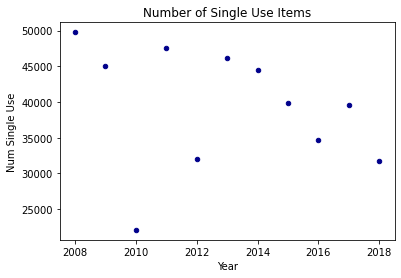

In [74]:
ax1suNonPerc = finalsingleusedf.plot.scatter(x='Year',
                        y='Num Single Use',
                      c='DarkBlue',
                        title = "Number of Single Use Items")

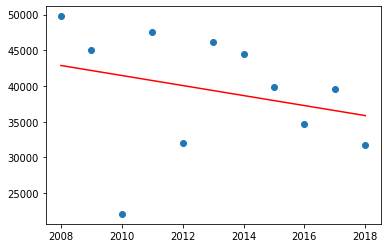

In [76]:
%matplotlib inline

xsunp = finalsingleusedf['Year'];
ysunp = finalsingleusedf['Num Single Use']

modelsunp = np.polyfit(xsunp,ysunp,1)

predictsunp = np.poly1d(modelsunp)
x_lin_reg_sunp = range(2008,2019)
y_lin_reg_sunp = predictsunp(x_lin_reg_sunp)
plt.scatter(xsunp,ysunp);
plt.plot(x_lin_reg_sunp, y_lin_reg_sunp, c = 'r')

In [77]:
import sklearn.metrics as metrics
yhatsunp = [predictsunp(2008),predictsunp(2009),predictsunp(2010),predictsunp(2011),predictsunp(2012),predictsunp(2013),predictsunp(2014),predictsunp(2015),predictsunp(2016),predictsunp(2017),predictsunp(2018)]

maesunp = metrics.mean_absolute_error(ysunp,yhatsunp);
print("Mean absolute error: ",maesunp);

r2sunp = metrics.r2_score(ysunp,yhatsunp);
print("R-squared: ", r2sunp);

Mean absolute error:  6194.667768595211
R-squared:  0.07600427414586663


R-squared of 76% means that 76% of the data fits the model. This shows that there is a trend of the amount of single use plastic found decreasing.

### Single Use Plastics by Percentage of Items

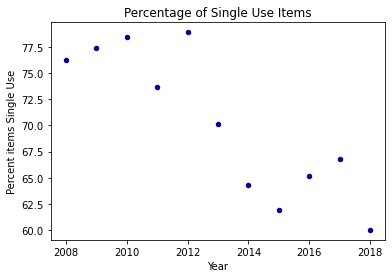

In [71]:
ax1su = finalsingleusedf.plot.scatter(x='Year',
                        y='Percent items Single Use',
                      c='DarkBlue',
                        title = "Percentage of Single Use Items")

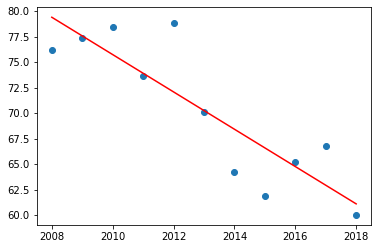

In [69]:
%matplotlib inline

xsu = finalsingleusedf['Year'];
ysu = finalsingleusedf['Percent items Single Use']

modelsu = np.polyfit(xsu,ysu,1)

predictsu = np.poly1d(modelsu)
x_lin_reg_su = range(2008,2019)
y_lin_reg_su = predictsu(x_lin_reg_su)
plt.scatter(xsu,ysu);
plt.plot(x_lin_reg_su, y_lin_reg_su, c = 'r')


#Source referenced:
#https://data36.com/linear-regression-in-python-numpy-polyfit/
    

In [70]:
import sklearn.metrics as metrics
yhatsu = [predictsu(2008),predictsu(2009),predictsu(2010),predictsu(2011),predictsu(2012),predictsu(2013),predictsu(2014),predictsu(2015),predictsu(2016),predictsu(2017),predictsu(2018)]

maesu = metrics.mean_absolute_error(ysu,yhatsu);
print("Mean absolute error: ",maesu);

r2su = metrics.r2_score(ysu,yhatsu);
print("R-squared: ", r2su);

Mean absolute error:  2.4978298624459643
R-squared:  0.7557168225458155


Wow! R-squared of 75%! Not too shabby! 